<a href="https://colab.research.google.com/github/N4877/clean-data/blob/main/Copy_of_Analysis_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks//content/amazon.csv.csv'
drive.mount('/content/drive', force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
# Import pandas
import pandas as pd
amazon = pd.read_csv('amazon.csv.csv', index_col='date', parse_dates=True)
amazon.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2012-05-21 00:00:00-04:00,10.7015,10.9990,10.641,10.9055,10.9055,71596000
2012-05-22 00:00:00-04:00,10.9155,10.9435,10.698,10.7665,10.7665,74662000
2012-05-23 00:00:00-04:00,10.7355,10.8775,10.559,10.8640,10.8640,84876000
2012-05-24 00:00:00-04:00,10.8490,10.8830,10.635,10.7620,10.7620,62822000
2012-05-25 00:00:00-04:00,10.7495,10.7990,10.611,10.6445,10.6445,43428000


In [ ]:
amazon = amazon.copy()
amazon.to_csv('/content/amazon.csv')

In [ ]:
# Display numbers of columns and rows
amazon.shape

(3238, 6)

In [ ]:
# Chreck columns name
amazon.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [ ]:
# Get types of data
amazon.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
adj_close,float64
volume,int64


In [ ]:
# Get summary statistics of data
amazon.describe()

,open,high,low,close,adj_close,volume
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3.238000e+03
mean,85.947427,86.922465,84.877483,85.926523,85.926523,7.410096e+07
std,61.878375,62.586234,61.092737,61.850855,61.850855,4.055279e+07
min,10.370000,10.561500,10.318500,10.411000,10.411000,1.500750e+07
25%,25.316999,25.622375,24.808000,25.194000,25.194000,4.913950e+07
50%,84.838753,85.566002,83.625248,84.627998,84.627998,6.332500e+07
75%,142.050003,143.938499,139.819996,142.502506,142.502506,8.659328e+07
max,239.020004,242.520004,238.029999,242.059998,242.059998,4.771220e+08


In [ ]:
# Check the missing data
amazon.isnull().sum()

,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

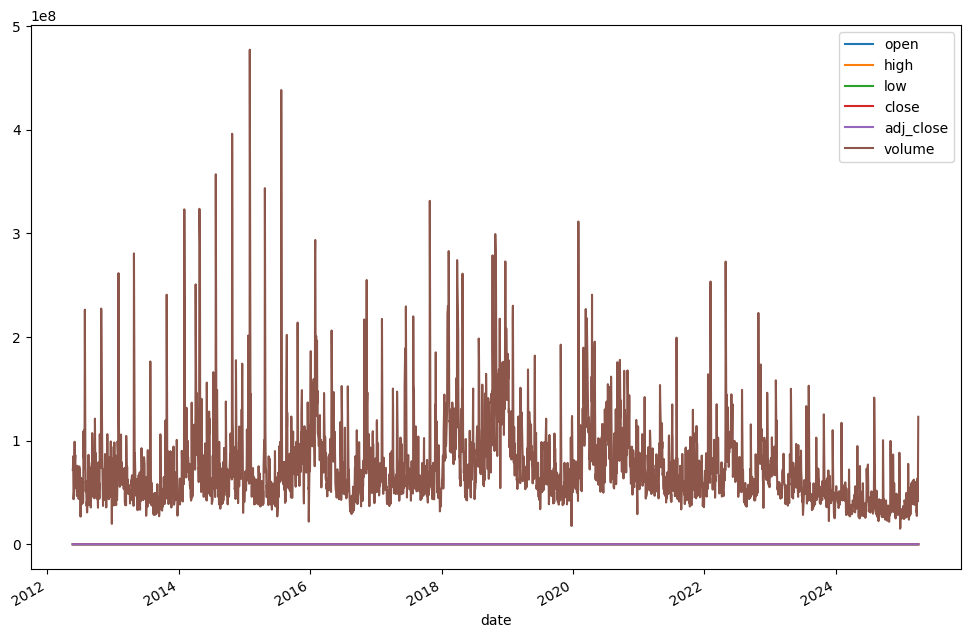

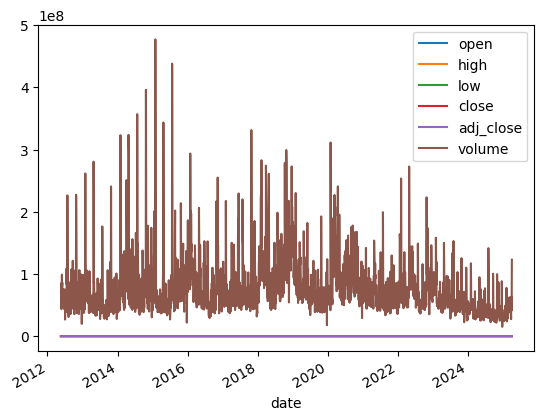

In [ ]:
# Change an index to date time
amazon.index = pd.to_datetime(amazon.index, utc=True)
amazon.plot(figsize=(12, 8))
amazon.plot()
plt.show()

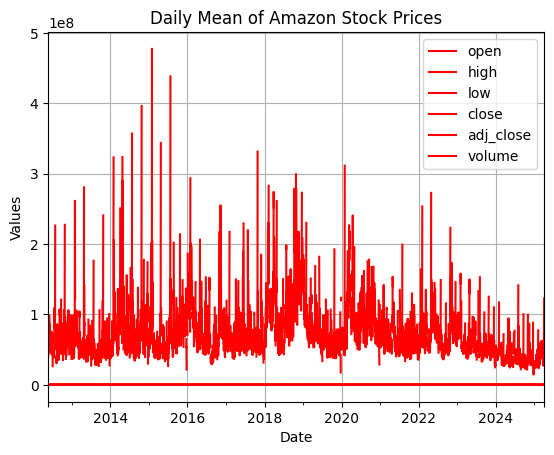

In [ ]:
# Resample the data to daily frequency and calculate the mean for each day

df_daily = amazon.resample('D').mean()

# Display the resampled DataFrame
df_daily.head()
df_daily.plot(grid=True, color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Daily Mean of Amazon Stock Prices')
plt.legend()

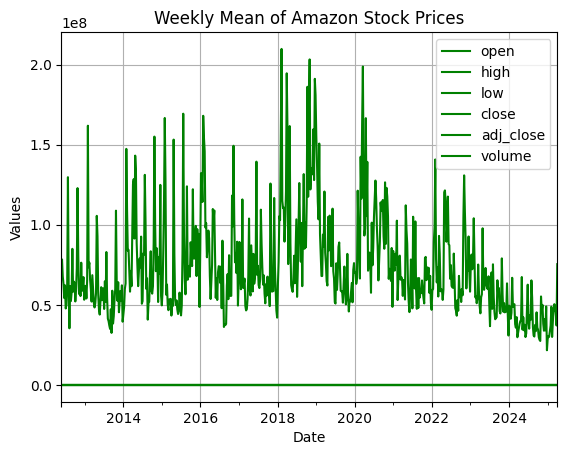

In [ ]:
# Resample data from daily to weekly
df_weekly = amazon.resample('W').mean()

# Display the resampled DataFrame
df_weekly.head()
df_weekly.plot(grid=True, color='green')
plt.title('Weekly Mean of Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

In [ ]:
# Compute percent change and different 0f time series
df_daily['pct_change'] = df_daily['close'].pct_change()
df_daily['diff'] = df_daily['close'].diff()
df_daily.dropna(inplace=True)
df_daily.head()

<ipython-input-45-8fc3ae5a2fe4>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_daily['pct_change'] = df_daily['close'].pct_change()


,open,high,low,close,adj_close,volume,pct_change,diff
date,,,,,,,,
2012-05-22 00:00:00+00:00,10.9155,10.9435,10.6980,10.7665,10.7665,74662000.0,-0.012746,-0.1390
2012-05-23 00:00:00+00:00,10.7355,10.8775,10.5590,10.8640,10.8640,84876000.0,0.009056,0.0975
2012-05-24 00:00:00+00:00,10.8490,10.8830,10.6350,10.7620,10.7620,62822000.0,-0.009389,-0.1020
2012-05-25 00:00:00+00:00,10.7495,10.7990,10.6110,10.6445,10.6445,43428000.0,-0.010918,-0.1175
2012-05-30 00:00:00+00:00,10.6070,10.6490,10.3875,10.4615,10.4615,81564000.0,-0.025704,-0.2760


In [ ]:
# Compute correlation between High and Low
df_daily['high'].corr(df_daily['low'])

np.float64(0.999788348014486)

**A correlation coefficient of 0.999788348014486 between 'High' and 'Low' daily prices indicates a very strong positive linear relationship between these two variables.**




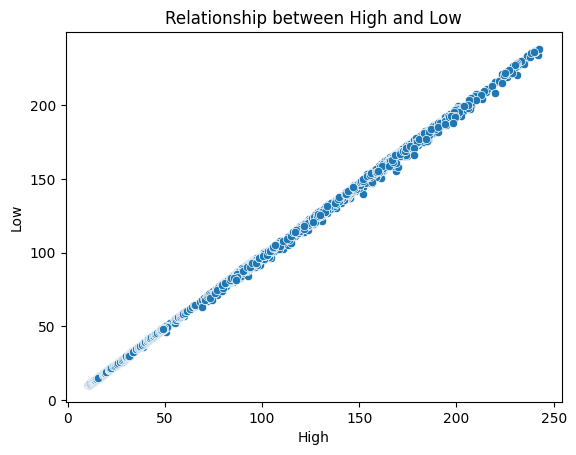

In [ ]:
# Plot relationship betwwen High and Low
sns.scatterplot(x='high', y='low', data=df_daily)
plt.title('Relationship between High and Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

***In previous scatter plot show strong positive linear relationship between high and Low. This points from clear upward sloping diagonal line. When the high increase the Low   value tendsalso increase. This means the two variables are highly correlated.***

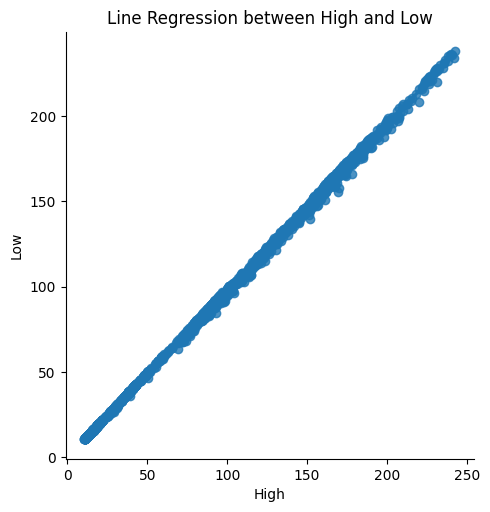

In [ ]:
# Calculate line regression bplot
import seaborn as sns
sns.lmplot(x='high', y='low', data=df_daily)
plt.title('Line Regression between High and Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

In [ ]:
# Create new data frame monthly data to calculate chang of month
df_monthly = amazon.resample('M').mean()
df_monthly.head()
df_monthly['pct_change'] = df_monthly['close'].pct_change()
df_monthly['diff'] = df_monthly['close'].diff()
df_monthly.dropna(inplace=True)
df_monthly.head()


<ipython-input-50-87143ae13022>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = amazon.resample('M').mean()


,open,high,low,close,adj_close,volume,pct_change,diff
date,,,,,,,,
2012-06-30 00:00:00+00:00,10.928310,11.060762,10.830214,10.963738,10.963738,6.261486e+07,0.022415,0.240363
2012-07-31 00:00:00+00:00,11.196381,11.319262,11.052667,11.203143,11.203143,7.365733e+07,0.021836,0.239405
2012-08-31 00:00:00+00:00,11.924587,12.051587,11.843261,11.949696,11.949696,5.234122e+07,0.066638,0.746553
2012-09-30 00:00:00+00:00,12.786789,12.905895,12.663368,12.787026,12.787026,6.691632e+07,0.070071,0.837331
2012-10-31 00:00:00+00:00,12.289857,12.409524,12.077286,12.214738,12.214738,7.768429e+07,-0.044755,-0.572288


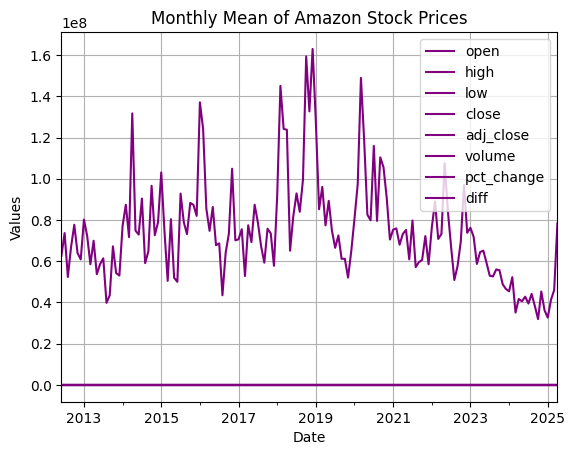

In [ ]:
# plot df_monthly
df_monthly.plot(grid=True, color='purple')
plt.title('Monthly Mean of Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()


In [ ]:
# Compute correlation between two variables High price and low price
df_monthly['high'].corr(df_monthly['low'])

np.float64(0.9999067400232884)

***There are strong correlation between two variables equal to 0.99 it is close to 1***

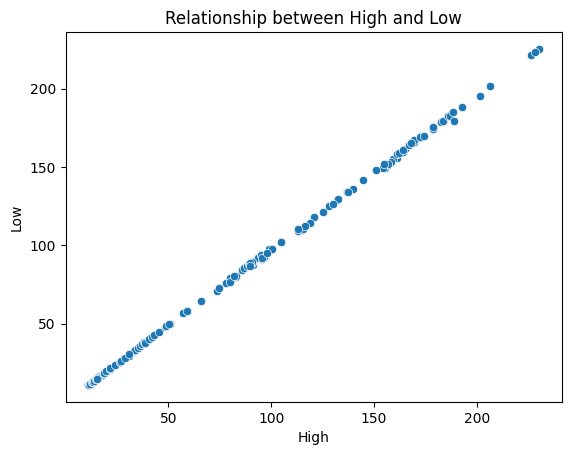

In [ ]:
# plot scatter to calculate related between two series
sns.scatterplot(x='high', y='low', data=df_monthly)
plt.title('Relationship between High and Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()



***The relationship still upward when stock price increase the low stock price increase too it is strong positive correlation***

### Simple line regression to find slop and intercept.
### That it is best fid between a depented variables y and an independent x variable. It minimize of sum of squared distance between data points and the regression liner, to use ordinary least squared you need to import statsmodels to fit the data.


In [ ]:
import statsmodels.api as sm
df_monthly['intercept'] = 1
lm = sm.OLS(df_monthly['close'], df_monthly[['intercept', 'high']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.829e+06
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        11:43:59   Log-Likelihood:                -98.286
No. Observations:                 155   AIC:                             200.6
Df Residuals:                     153   BIC:                             206.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0482      0.063      0.761      0.448      -0.077       0.173
high           0.9879      0.001   1682.025      0.000       0.987       0.989
==============================================================================
Omnibus:                       41.595   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.952
Skew:                          -1.191   Prob(JB):                     2.17e-19
Kurtosis:                       5.763   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**1- R-squared: 1.000 and Adj. R-squared: 1.000:**

**This is an extremely high R-squared value. It indicates that the 'high' price explains almost 100% of the variability in the 'close' price. While a high R-squared is often desirable, a value this close to 1.**

**That the two variables are very directly related, as is likely the case here with high and close prices of the same stock.**

**2- Method: Least Squares: This is the standard method used to fit the regression line by minimizing the sum of the squared differences between the observed and predicted values.**

**3- coef: This column shows the estimated coefficients for each term in the model.**

**4- intercept: 0.0482: This is the estimated value of the 'close' price when the 'high' price is zero. In the context of stock prices, an intercept close to zero is expected since the price wouldn't be significantly different from zero if the high was zero.**

**5- high: 0.9879: This is the slope of the regression line. It means that for every one-unit increase in the 'high' price, the 'close' price is estimated to increase by  approximately 0.9879 units. This again shows a very strong positive relationship.**

**6- P>|t|: The p-value associated with the t-statistic.**

**7- intercept: 0.448: The p-value for the intercept is greater than 0.05 (a common significance level), suggesting that the intercept is not statistically significantly different from zero at the 5% significance level.**

**8- high: 0.000: The p-value for 'high' is less than 0.05 (and very close to zero), indicating that the 'high' price is a statistically significant predictor of the 'close' price.**

 ***Conclusion, the model shows that 'high' is a very strong and statistically significant predictor of 'close'. However, the diagnostics (Durbin-Watson and normality tests) suggest that the model's assumptions are violated. This is likely due to the inherent time-series nature of stock price data and the very close relationship between daily high and close prices. While the R-squared is extremely high, indicating a great fit to the existing data, the assumption violations might impact the validity of statistical inferences and predictions based solely on this simple OLS model without considering the time-series properties of the data.***

In [ ]:

# prompt: In previous cod  can you give me next step

# Add a new column for the dependent variable for the daily data
df_daily['intercept'] = 1

# Fit the OLS model for daily data
lm_daily = sm.OLS(df_daily['close'], df_daily[['intercept', 'high']])
results_daily = lm_daily.fit()

# Print the summary of the daily model
print("Summary for Daily Data:")
print(results_daily.summary())

# Analyze the results (e.g., look at R-squared, p-values for intercept and high)
# Based on the summary, you can interpret the slope (coefficient for 'high')
# and intercept, and assess the goodness of fit (R-squared).

# You can also get specific results:
print(f"Daily Intercept: {results_daily.params['intercept']}")
print(f"Daily Slope (High): {results_daily.params['high']}")
print(f"Daily R-squared: {results_daily.rsquared}")


Summary for Daily Data:
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.312e+06
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:19:41   Log-Likelihood:                -3939.5
No. Observations:                2531   AIC:                             7883.
Df Residuals:                    2529   BIC:                             7895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0444      0

In [ ]:
# We need to add constant
dfx = sm.add_constant(df_monthly['high'])
# regress dfx
result = sm.OLS(df_monthly['close'], dfx).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.829e+06
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:20:07   Log-Likelihood:                -98.286
No. Observations:                 155   AIC:                             200.6
Df Residuals:                     153   BIC:                             206.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0482      0.063      0.761      0.448      -0.077       0.173
high           0.9879      0.001   1682.025      0.000       0.987       0.989
==============================================================================
Omnibus:                       41.595   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.952
Skew:                          -1.191   Prob(JB):                     2.17e-19
Kurtosis:                       5.763   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DataFrame with 1-month momentum signal and returns:
                               close  pct_change  1m_momentum  \
date                                                            
2012-06-30 00:00:00+00:00  10.963738    0.022415          NaN   
2012-07-31 00:00:00+00:00  11.203143    0.021836     0.021836   
2012-08-31 00:00:00+00:00  11.949696    0.066638     0.066638   
2012-09-30 00:00:00+00:00  12.787026    0.070071     0.070071   
2012-10-31 00:00:00+00:00  12.214738   -0.044755    -0.044755   

                           momentum_signal  momentum_returns  
date                                                          
2012-06-30 00:00:00+00:00                0               NaN  
2012-07-31 00:00:00+00:00                1          0.000000  
2012-08-31 00:00:00+00:00                1          0.066638  
2012-09-30 00:00:00+00:00                1          0.070071  
2012-10-31 00:00:00+00:00                0         -0.044755  

DataFrame with Moving Average Crossover signal and

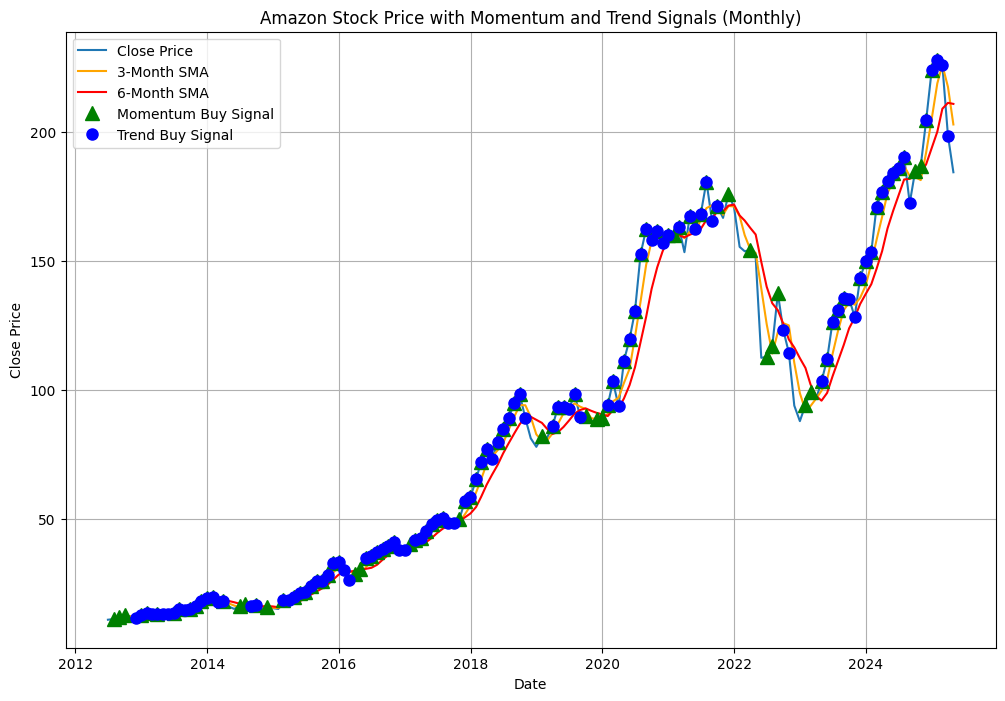

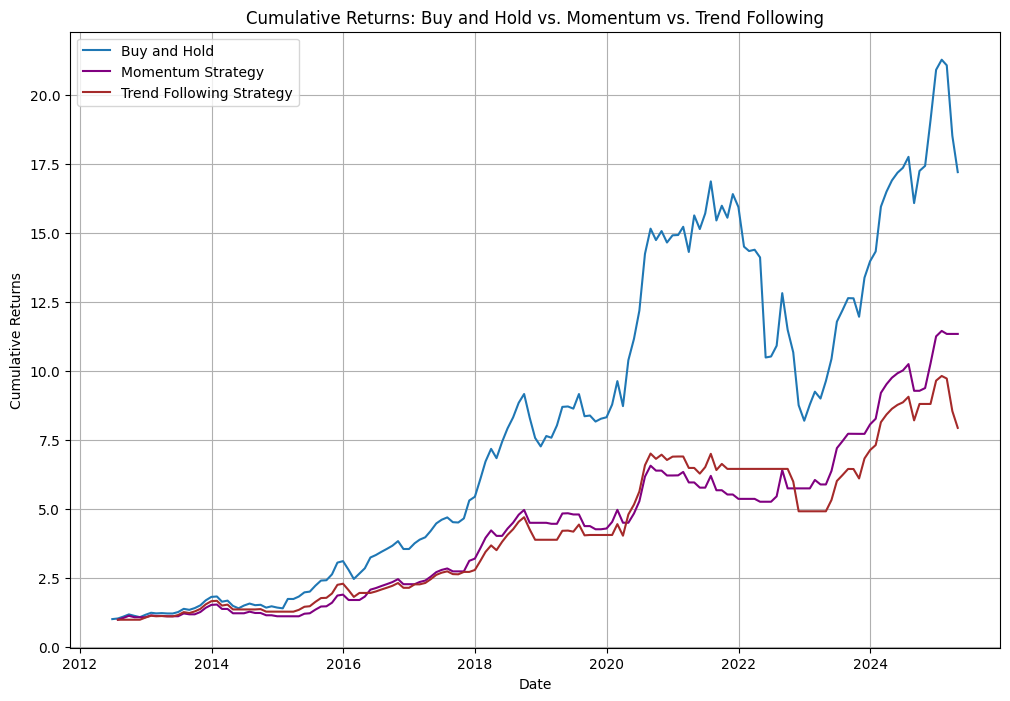

In [ ]:
# prompt: Create Momentum or trend following use df_monthly

import matplotlib.pyplot as plt
# Momentum Strategy (e.g., 1-month momentum)
# Calculate the 1-month price change
df_monthly['1m_momentum'] = df_monthly['close'].pct_change(periods=1)

# Simple momentum strategy: Buy if the price went up last month
# Create a signal (1 for buy, 0 for hold/sell)
df_monthly['momentum_signal'] = (df_monthly['1m_momentum'] > 0).astype(int)

# You could then use this signal to backtest a trading strategy.
# For example, calculate returns based on the signal:
df_monthly['momentum_returns'] = df_monthly['pct_change'] * df_monthly['momentum_signal'].shift(1) # Shift signal by 1 period to avoid look-ahead bias

print("DataFrame with 1-month momentum signal and returns:")
print(df_monthly[['close', 'pct_change', '1m_momentum', 'momentum_signal', 'momentum_returns']].head())

# Trend Following Strategy (e.g., Moving Average Crossover)
# Calculate a short-term (e.g., 3-month) and long-term (e.g., 6-month) moving average
df_monthly['SMA_3M'] = df_monthly['close'].rolling(window=3).mean()
df_monthly['SMA_6M'] = df_monthly['close'].rolling(window=6).mean()

# Generate a trend signal: Buy when the short-term MA crosses above the long-term MA
df_monthly['trend_signal'] = 0
df_monthly.loc[df_monthly['SMA_3M'] > df_monthly['SMA_6M'], 'trend_signal'] = 1

# You could then use this signal to backtest a trading strategy.
# For example, calculate returns based on the signal:
df_monthly['trend_returns'] = df_monthly['pct_change'] * df_monthly['trend_signal'].shift(1) # Shift signal by 1 period

print("\nDataFrame with Moving Average Crossover signal and returns:")
print(df_monthly[['close', 'SMA_3M', 'SMA_6M', 'trend_signal', 'trend_returns']].dropna().head())

# Plotting the signals and prices
plt.figure(figsize=(12, 8))
plt.plot(df_monthly['close'], label='Close Price')
plt.plot(df_monthly['SMA_3M'], label='3-Month SMA', color='orange')
plt.plot(df_monthly['SMA_6M'], label='6-Month SMA', color='red')
plt.plot(df_monthly.loc[df_monthly['momentum_signal'] == 1].index,
         df_monthly['close'][df_monthly['momentum_signal'] == 1],
         '^', markersize=10, color='g', lw=0, label='Momentum Buy Signal')
plt.plot(df_monthly.loc[df_monthly['trend_signal'] == 1].index,
         df_monthly['close'][df_monthly['trend_signal'] == 1],
         'o', markersize=8, color='b', lw=0, label='Trend Buy Signal')

plt.title('Amazon Stock Price with Momentum and Trend Signals (Monthly)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# To evaluate the performance of these strategies, you would typically
# calculate cumulative returns and other performance metrics.
df_monthly['cumulative_momentum_returns'] = (1 + df_monthly['momentum_returns']).cumprod()
df_monthly['cumulative_trend_returns'] = (1 + df_monthly['trend_returns']).cumprod()
df_monthly['cumulative_buy_and_hold'] = (1 + df_monthly['pct_change']).cumprod()

plt.figure(figsize=(12, 8))
plt.plot(df_monthly['cumulative_buy_and_hold'], label='Buy and Hold')
plt.plot(df_monthly['cumulative_momentum_returns'], label='Momentum Strategy', color='purple')
plt.plot(df_monthly['cumulative_trend_returns'], label='Trend Following Strategy', color='brown')
plt.title('Cumulative Returns: Buy and Hold vs. Momentum vs. Trend Following')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

**This previous chart show a monthly view of Amazon's stock price behavior along with technical signals derived from short- and medium=term moving averages.**
**It includes Momentum and Trend buy signals, this opportunities for investors.**


*   Components:
**Blue Line: Actual monthly closing price of Amazon stock**
* **Orange Line 3 Month SMA( short monthly trend indicator - shows the average price over the last 3 month)**
**Signal Green Triangle Momentum Buy Signal(Show Signals based on upword short-term price momentum)**

**Green Line 6-month SMA(Medium-term trend indicator=show the average price over the last 6 month)**
**Blue Circles Drend Buy Signal(Signals based on crossover of 3 -month- and 6-month SAMs)**
###**Conclusion**
**This chart combain two technical straegies to guide buy decisions
Momentum signals catch early trend shift.
Trend signals confirm long-term direction.**


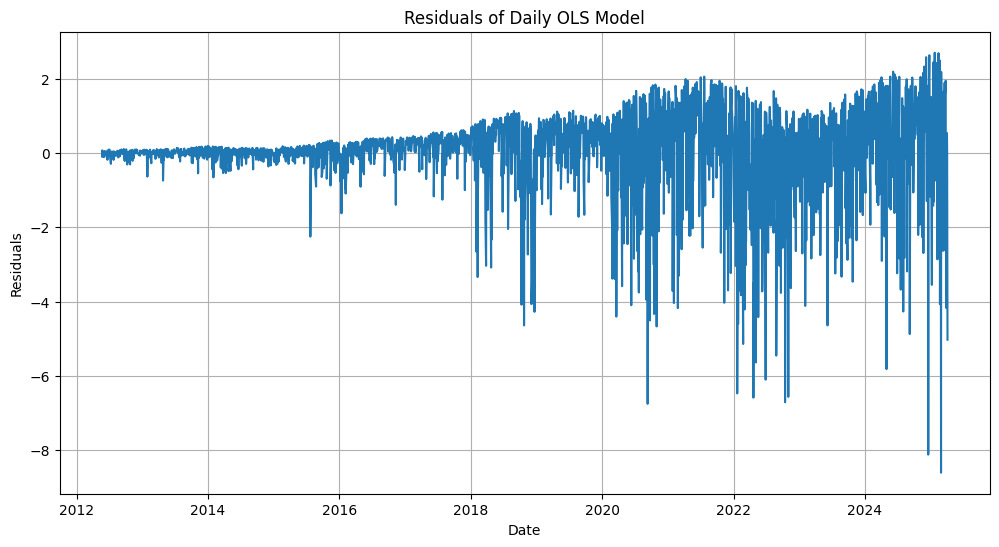


Ljung-Box test results for Daily Model Residuals (up to lag 10):
       lb_stat     lb_pvalue
10  287.626271  6.395798e-56


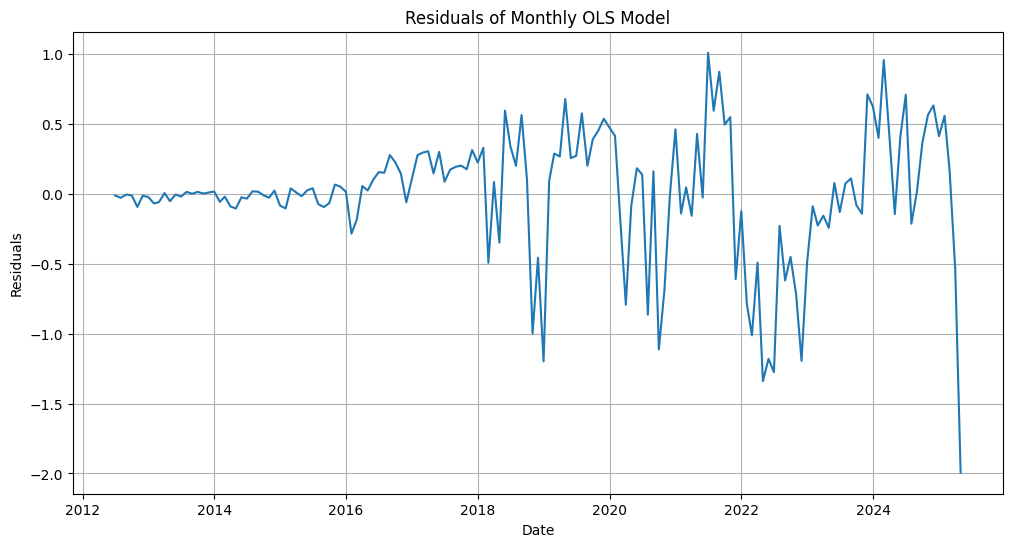


Ljung-Box test results for Monthly Model Residuals (up to lag 10):


,lb_stat,lb_pvalue
10,87.356672,1.787556e-14


In [ ]:
# prompt: Decated if there is White Noise in our time series

import matplotlib.pyplot as plt
# Use Ljung-Box test to check for white noise in the residuals of the OLS model
# First, calculate the residuals from the daily OLS model
residuals_daily = results_daily.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_daily)
plt.title('Residuals of Daily OLS Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Perform the Ljung-Box test on the residuals
# The null hypothesis is that the data are independently distributed (i.e., the residuals are white noise)
# We use the `acorr_ljungbox` function from statsmodels
# We'll test up to lag 10, for example
ljung_box_test_daily = sm.stats.acorr_ljungbox(residuals_daily, lags=[10], return_df=True)

print("\nLjung-Box test results for Daily Model Residuals (up to lag 10):")
print(ljung_box_test_daily)

# Interpretation:
# Look at the 'lb_pvalue' column.
# If the p-value is greater than a chosen significance level (commonly 0.05),
# we do not reject the null hypothesis, suggesting the residuals are white noise.
# If the p-value is less than 0.05, we reject the null hypothesis, suggesting
# there is significant autocorrelation in the residuals, meaning they are not white noise.

# You can repeat this for the monthly model residuals as well if needed
residuals_monthly = results.resid # Use 'results' from the monthly OLS model

plt.figure(figsize=(12, 6))
plt.plot(residuals_monthly)
plt.title('Residuals of Monthly OLS Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

ljung_box_test_monthly = sm.stats.acorr_ljungbox(residuals_monthly, lags=[10], return_df=True)

print("\nLjung-Box test results for Monthly Model Residuals (up to lag 10):")
ljung_box_test_monthly

# Based on the p-values from the Ljung-Box tests, you can conclude whether
# the residuals of your models behave like white noise.
# If the residuals are not white noise, it indicates that your model might not be
# capturing all the underlying patterns or dependencies in the time series,
# and further model improvements might be needed.

**In this above chart show the residuals  are White Noice
p-value more than 0.05
We need to improve the model.**

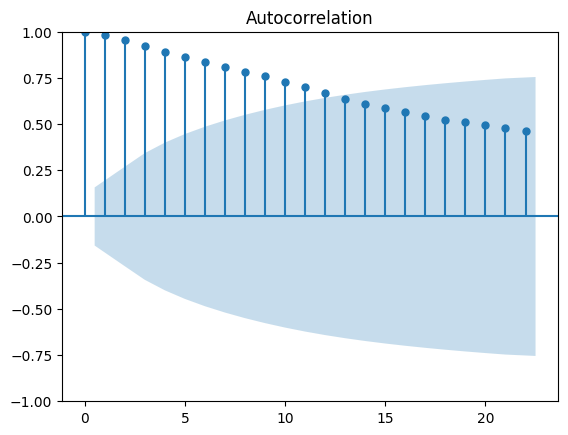

In [ ]:
# use ACF function to show correlation in different lags
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_monthly['close'])
plt.show()

In [ ]:
# print acual ACF
from statsmodels.tsa.stattools import acf
print(acf(df_monthly['close']))

[1.         0.97935324 0.953803   0.92200413 0.89141256 0.86177182
 0.83380869 0.80851142 0.78226454 0.75800248 0.72877839 0.6980404
 0.66730764 0.63746185 0.61029444 0.58499703 0.56320533 0.54297752
 0.52406701 0.50855305 0.49248762 0.47707651]


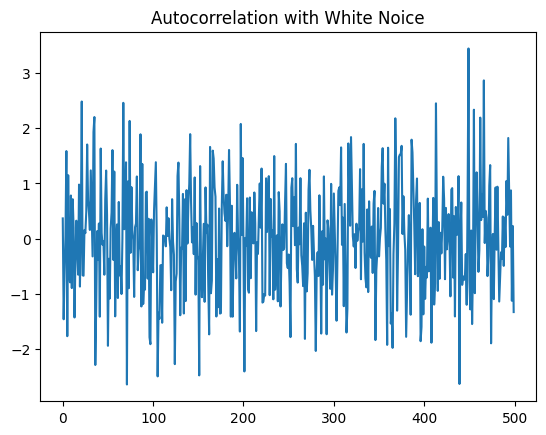

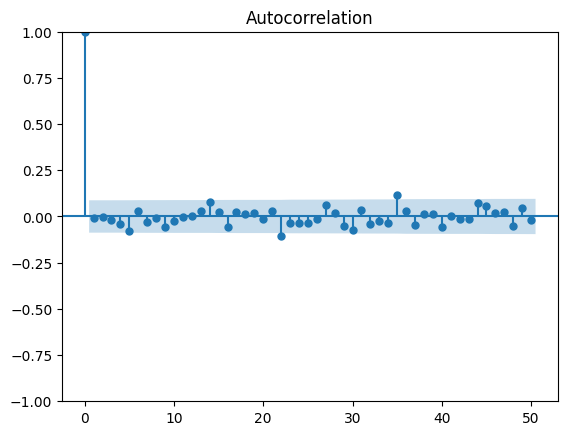

In [ ]:
# Simulate White noise
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import matplotlib.pyplot as plt
noice = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noice)
plt.title('Autocorrelation with White Noice')
# Put lake to 50
plot_acf(noice, lags=50)

plt.show()


--- ADF Test for Monthly Close Price ---
ADF Statistic: -0.55
P-value: 0.882
Critical Values:
  1%: -3.47
  5%: -2.88
  10%: -2.58
Conclusion: Fail to reject the null hypothesis (p-value >= 0.05). The Monthly Close Price time series is likely non-stationary and could be a Random Walk.

--- ADF Test for Daily Close Price ---
ADF Statistic: -0.84
P-value: 0.807
Critical Values:
  1%: -3.43
  5%: -2.86
  10%: -2.57
Conclusion: Fail to reject the null hypothesis (p-value >= 0.05). The Daily Close Price time series is likely non-stationary and could be a Random Walk.


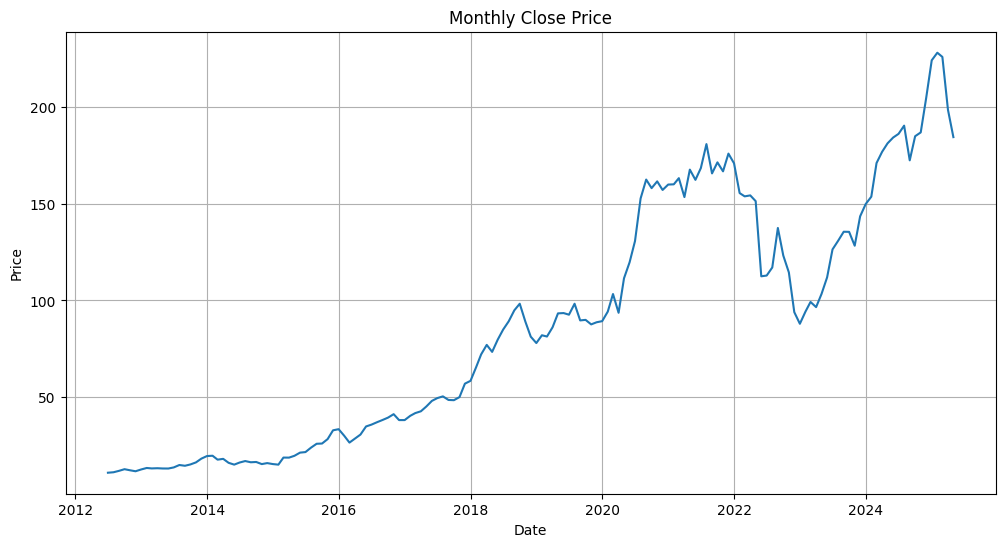

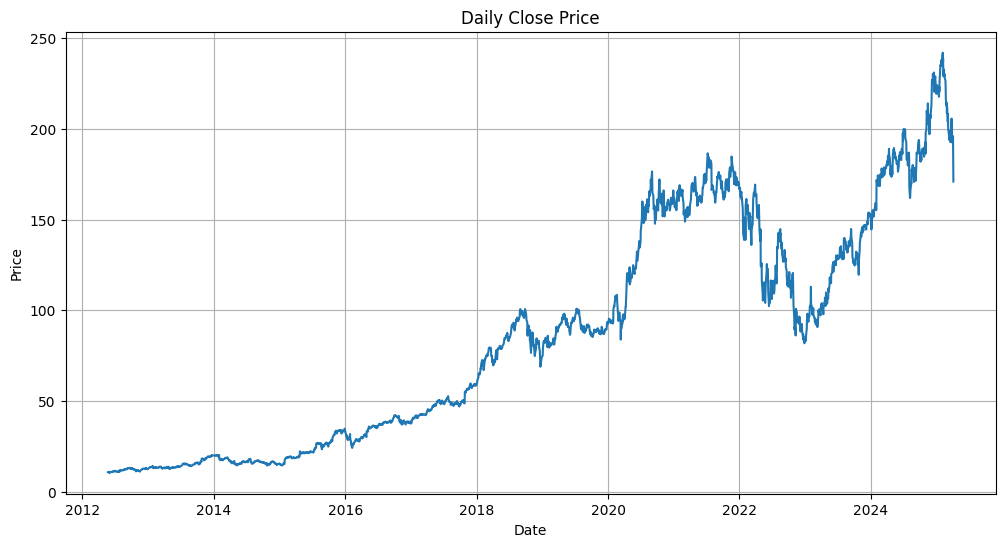

In [ ]:
# prompt: Decated if there is Random Walk in time seris

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd # Ensure pandas is imported if not already in the scope

# Function to perform and interpret the ADF test
def check_random_walk(time_series, name):
    """
    Performs the Augmented Dickey-Fuller test to check for a Random Walk.

    Args:
        time_series (pd.Series): The time series data.
        name (str): The name of the time series for printing results.
    """
    print(f"\n--- ADF Test for {name} ---")
    # Perform the ADF test
    result = adfuller(time_series.dropna()) # Drop any potential NaN values

    # Extract and print the test statistics and p-value
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f'ADF Statistic: {adf_statistic:.2f}')
    print(f'P-value: {p_value:.3f}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'  {key}: {value:.2f}')

    # Interpret the results
    if p_value <= 0.05:
        print(f"Conclusion: Reject the null hypothesis (p-value < 0.05). The {name} time series is likely stationary and not a pure Random Walk.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis (p-value >= 0.05). The {name} time series is likely non-stationary and could be a Random Walk.")

# Check for Random Walk in the monthly 'close' price
# Make sure df_monthly is defined and has a 'close' column
if 'df_monthly' in locals() and 'close' in df_monthly.columns:
    check_random_walk(df_monthly['close'], "Monthly Close Price")
else:
    print("df_monthly or 'close' column not found. Please ensure the dataframe is created.")


# Check for Random Walk in the daily 'close' price
# Make sure df_daily is defined and has a 'close' column
if 'df_daily' in locals() and 'close' in df_daily.columns:
    check_random_walk(df_daily['close'], "Daily Close Price")
else:
    print("df_daily or 'close' column not found. Please ensure the dataframe is created.")

# You can also plot the time series to visually inspect for trends or seasonality
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['close'])
plt.title('Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_daily['close'])
plt.title('Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# If the ADF test suggests non-stationarity (potential Random Walk),
# you might consider differencing the series to make it stationary
# For example, differencing the monthly close price:
# df_monthly['close_diff'] = df_monthly['close'].diff().dropna()
# check_random_walk(df_monthly['close_diff'], "Differenced Monthly Close Price")

In [ ]:
# We use Arima model to process white noice
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_monthly['close'], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  155
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -540.334
Date:                Thu, 15 May 2025   AIC                           1086.667
Time:                        13:50:49   BIC                           1095.798
Sample:                    06-30-2012   HQIC                          1090.376
                         - 04-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.6152     63.240      1.496      0.135     -29.332     218.563
ar.L1          0.9949      0.010    100.675      0.000       0.975       1.014
sigma2        60.6210      3.983     15.221      0.0

In [ ]:
# Arima prameter
model_fit.params

,0
const,94.615183
ar.L1,0.994865
sigma2,60.621026


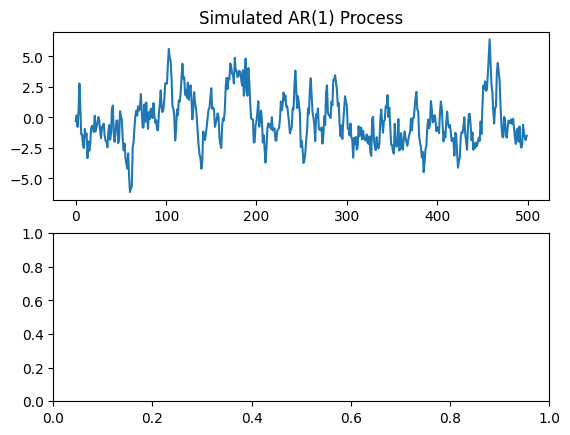

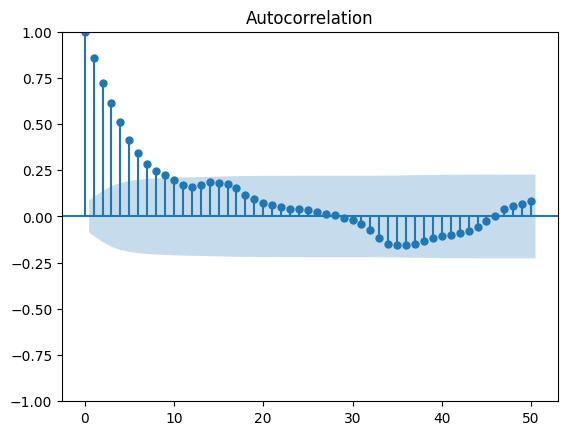

In [ ]:
# ar parameter = -0.9
import numpy as np
ar = np.array([1, -0.9])
ma =np.array([1])
AR_object = sm.tsa.ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=500)
plt.subplot(2,1,1)
plt.plot(simulated_data)
plt.title('Simulated AR(1) Process')
# plot2
plt.subplot(2,1,2)
ar2 = np.array([1, -0.9, 0.3])
ma2 =np.array([1])
AR_object2 = sm.tsa.ArmaProcess(ar2, ma2)
plot_acf(simulated_data, lags=50)
plt.show()




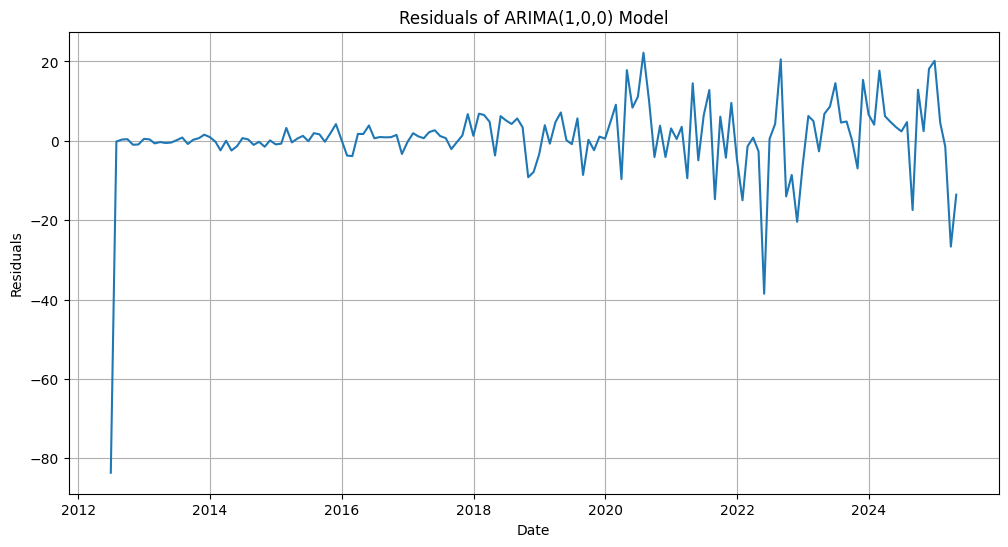


Ljung-Box test results for ARIMA(1,0,0) Model Residuals (up to lag 10):
     lb_stat  lb_pvalue
10  5.228602   0.875393


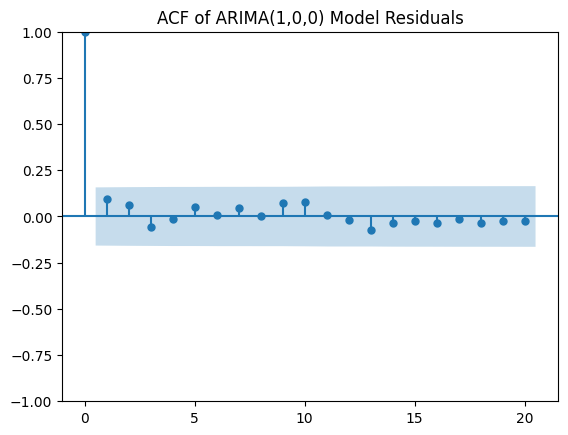


Forecasted values for the next 12 periods:
2025-05-31 00:00:00+00:00    183.936479
2025-06-30 00:00:00+00:00    183.477826
2025-07-31 00:00:00+00:00    183.021529
2025-08-31 00:00:00+00:00    182.567574
2025-09-30 00:00:00+00:00    182.115950
2025-10-31 00:00:00+00:00    181.666646
2025-11-30 00:00:00+00:00    181.219648
2025-12-31 00:00:00+00:00    180.774946
2026-01-31 00:00:00+00:00    180.332528
2026-02-28 00:00:00+00:00    179.892381
2026-03-31 00:00:00+00:00    179.454494
2026-04-30 00:00:00+00:00    179.018855
Freq: ME, Name: predicted_mean, dtype: float64


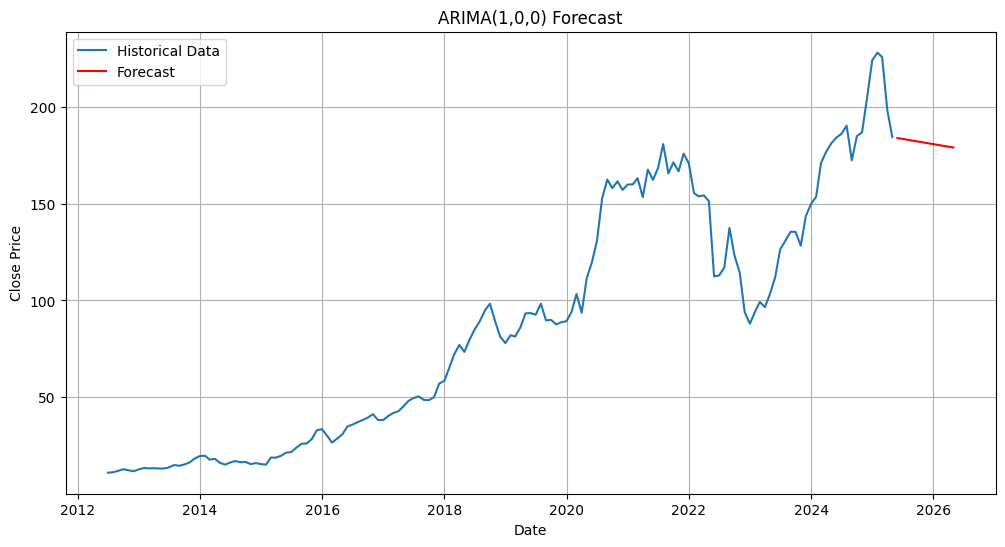

In [ ]:
# Evaluate the fitted ARIMA(1,0,0) model

# Get the residuals of the fitted model
residuals_arima = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_arima)
plt.title('Residuals of ARIMA(1,0,0) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Perform the Ljung-Box test on the residuals
# Test up to a relevant number of lags (e.g., 10 or 20 for monthly data)
ljung_box_test_arima = sm.stats.acorr_ljungbox(residuals_arima, lags=[10], return_df=True)

print("\nLjung-Box test results for ARIMA(1,0,0) Model Residuals (up to lag 10):")
print(ljung_box_test_arima)

# Interpretation: Check the 'lb_pvalue'. If it's > 0.05, the residuals are likely white noise.
# If it's <= 0.05, there's still significant autocorrelation, and a different model might be needed.

# You can also plot the ACF of the residuals to visually inspect for remaining autocorrelation
plot_acf(residuals_arima, lags=20)
plt.title('ACF of ARIMA(1,0,0) Model Residuals')
plt.show()

# Forecasting (Example - forecasting 12 steps ahead)
# Replace 'start' and 'end' with appropriate dates if needed, or use steps
# For example, to forecast the next 12 months after the end of your data:
# start_date = df_monthly.index[-1] + pd.DateOffset(months=1)
# end_date = df_monthly.index[-1] + pd.DateOffset(months=12)
# forecast = model_fit.predict(start=start_date, end=end_date)

# A simpler way to forecast a fixed number of steps:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

print(f"\nForecasted values for the next {forecast_steps} periods:")
print(forecast)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['close'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA(1,0,0) Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()